<a href="https://colab.research.google.com/github/Amulya-Rao-mj/Machine-learning-lab-/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9995271867612293
[[ 979    1]
 [   0 1135]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135

    accuracy                           1.00      2115
   macro avg       1.00      1.00      1.00      2115
weighted avg       1.00      1.00      1.00      2115



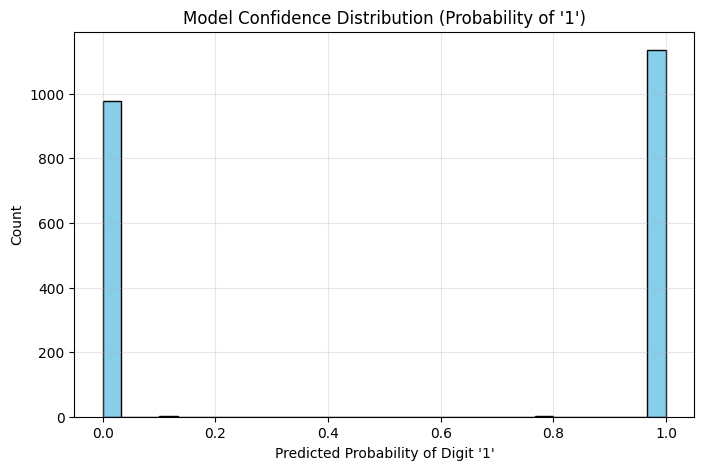

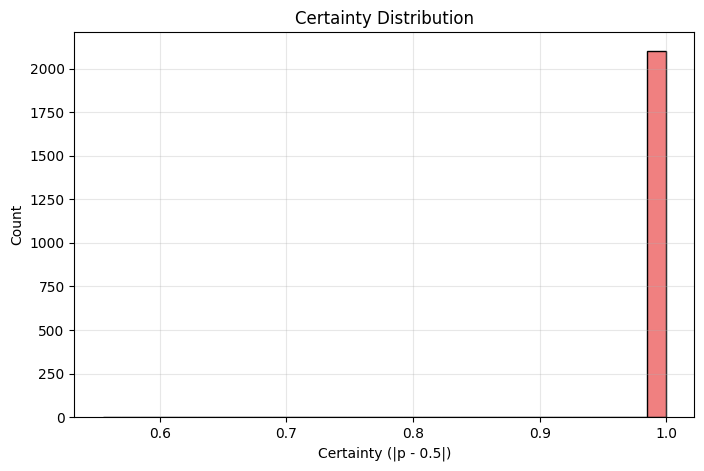

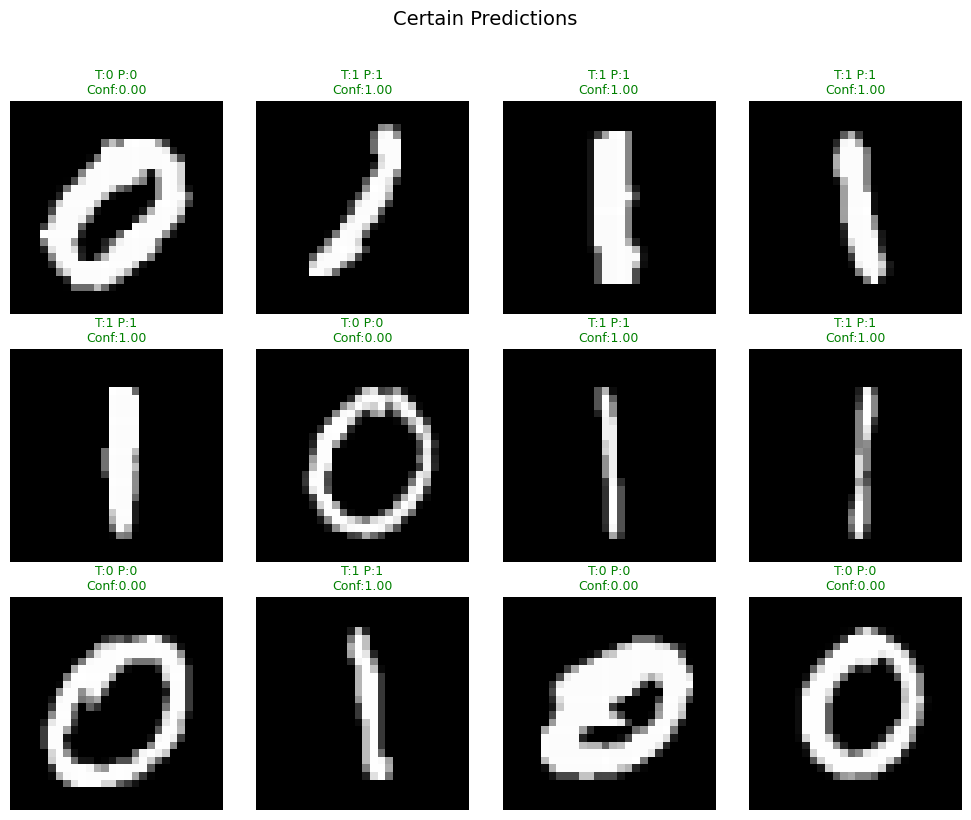

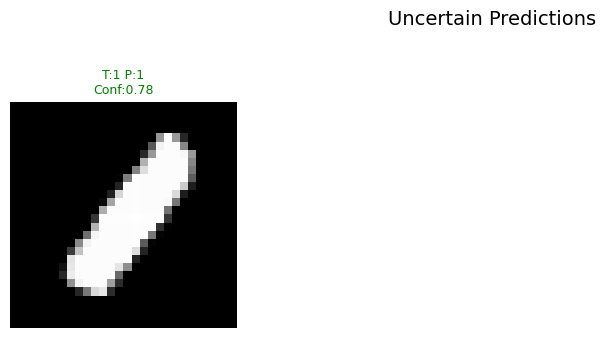

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

X_train_full = train_df.drop(columns=["label"])
y_train_full = train_df["label"]
X_test_full = test_df.drop(columns=["label"])
y_test_full = test_df["label"]

train_mask = (y_train_full == 0) | (y_train_full == 1)
test_mask = (y_test_full == 0) | (y_test_full == 1)

X_train = X_train_full[train_mask]
y_train = y_train_full[train_mask]
X_test = X_test_full[test_mask]
y_test = y_test_full[test_mask]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)
probs = log_reg.predict_proba(X_test_scaled)[:, 1]
certainty = np.abs(probs - 0.5) * 2

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.hist(probs, bins=30, color='skyblue', edgecolor='black')
plt.title("Model Confidence Distribution (Probability of '1')")
plt.xlabel("Predicted Probability of Digit '1'")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
plt.hist(certainty, bins=30, color='lightcoral', edgecolor='black')
plt.title("Certainty Distribution")
plt.xlabel("Certainty (|p - 0.5|)")
plt.ylabel("Count")
plt.grid(alpha=0.3)
plt.show()

certain_idx = np.where(certainty > 0.9)[0]
uncertain_idx = np.where(certainty < 0.6)[0]

def plot_examples(X, y_true, y_pred, probs, indices, n=12, title="Examples"):
    plt.figure(figsize=(10, 8))
    selected = np.random.choice(indices, min(n, len(indices)), replace=False)
    for i, idx in enumerate(selected):
        plt.subplot(3, 4, i + 1)
        img = X.iloc[idx].values.reshape(28, 28)
        plt.imshow(img, cmap='gray', interpolation='nearest')
        pred = y_pred[idx]
        true = y_true.iloc[idx]
        p = probs[idx]
        color = "green" if pred == true else "red"
        plt.title(f"T:{true} P:{pred}\nConf:{p:.2f}", color=color, fontsize=9)
        plt.axis("off")
    plt.suptitle(title, fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

plot_examples(X_test, y_test, y_pred, probs, certain_idx, n=12, title="Certain Predictions")
plot_examples(X_test, y_test, y_pred, probs, uncertain_idx, n=12, title="Uncertain Predictions")
